## make submissions using weighted rank avg based on the the oof

In [53]:
import sys
from tqdm import tqdm_notebook as tqdm

import numpy as np
import pandas as pd

from sklearn.metrics import roc_auc_score

from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

# re-load functions
%load_ext autoreload
%autoreload 2

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
%config InlineBackend.figure_formats = {'png', 'retina'}

## load models

In [4]:
ls ../mnt/blendings/2nd/

e091_e081_bin_change_0_10_2019-04-08-05-19-25_0.92396_oofs.csv
e091_e081_bin_change_0_10_2019-04-08-05-19-25_0.92396_oofs.pkl
e091_e081_bin_change_0_10_2019-04-08-05-19-25_0.92396_sub.csv.gz
e091_e081_bin_change_0_10_2019-04-08-05-19-25_0.92396_sub_no_rank.csv
nagiss_01_oof_CV_92065_LB_921.csv
nagiss_01_submission_CV_92065_LB_921.csv
nagiss_02_NN_oof_CV_92118.csv
nagiss_02_NN_submission_CV_92118.csv
oof_0.9237483.csv
oof_ra_x005_lgb_F1200_06.04.2019-10_58_roc0.923686_thr0.7545646.csv
sub_pa_x005_lgb_F1200_06.04.2019-10_58__0.923686_MCC0.599.csv
V600_0.9237483.csv


In [42]:
reals = np.load('../mnt/inputs/nes_info/real_samples_indexes.npz.npy')

# guchio
guchio_oof = pd.read_csv('../mnt/blendings/2nd/e091_e081_bin_change_0_10_2019-04-08-05-19-25_0.92396_oofs.csv')
guchio_sub = pd.read_csv('../mnt/blendings/2nd/e091_e081_bin_change_0_10_2019-04-08-05-19-25_0.92396_sub_no_rank.csv')

# nagiss
naggis_oof = pd.read_csv('../mnt/blendings/2nd/nagiss_01_oof_CV_92065_LB_921.csv')
naggis_sub = pd.read_csv('../mnt/blendings/2nd/nagiss_01_submission_CV_92065_LB_921.csv')

# nagiss nn
naggis_nn_oof = pd.read_csv('../mnt/blendings/2nd/nagiss_02_NN_oof_CV_92118.csv')
naggis_nn_sub = pd.read_csv('../mnt/blendings/2nd/nagiss_02_NN_submission_CV_92118.csv')

# vicens
vicens_oof = pd.read_csv('../mnt/blendings/2nd/oof_0.9237483.csv')
vicens_sub = pd.read_csv('../mnt/blendings/2nd/V600_0.9237483.csv')

In [44]:
# it is in the same order
(guchio_oof.ID_code.values == naggis_oof.ID_code.values).mean(), (guchio_oof.ID_code.values == vicens_oof.ID_code.values).mean(), (naggis_oof.ID_code.values == vicens_oof.ID_code.values).mean(), (guchio_oof.ID_code.values == naggis_nn_oof.ID_code.values).mean()

(1.0, 1.0, 1.0, 1.0)

In [45]:
# it is in the same order
(guchio_sub.ID_code.values == naggis_sub.ID_code.values).mean(), (guchio_sub.ID_code.values == vicens_sub.ID_code.values).mean(), (naggis_sub.ID_code.values == vicens_sub.ID_code.values).mean(), (guchio_sub.ID_code.values == naggis_nn_sub.ID_code.values).mean()

(1.0, 1.0, 1.0, 1.0)

In [30]:
def plot_oof_and_sub_hist(ax, oof_series, sub_series, reals):
    plt_sub = sub_series.iloc[reals]
    sns.distplot(oof_series, kde=False, bins=100, ax=ax, color=None, label='oof', norm_hist=True, hist_kws={'alpha': 0.3})
    sns.distplot(plt_sub, kde=False, bins=100, ax=ax, color='red', label='sub', norm_hist=True, hist_kws={'alpha': 0.3})
    ax.set_xlim(0.0, 1.0)

In [49]:
naggis_nn_oof.head()

,ID_code,pred
0,train_0,0.000645
1,train_1,0.481753
2,train_2,0.004044
3,train_3,0.038709
4,train_4,0.035474


/root/anaconda3/lib/python3.7/site-packages/matplotlib/ticker.py:2241: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  "Data has no positive values, and therefore cannot be "
/root/anaconda3/lib/python3.7/site-packages/matplotlib/ticker.py:2241: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  "Data has no positive values, and therefore cannot be "
/root/anaconda3/lib/python3.7/site-packages/matplotlib/ticker.py:2241: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  "Data has no positive values, and therefore cannot be "
/root/anaconda3/lib/python3.7/site-packages/matplotlib/ticker.py:2241: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  "Data has no positive values, and therefore cannot be "


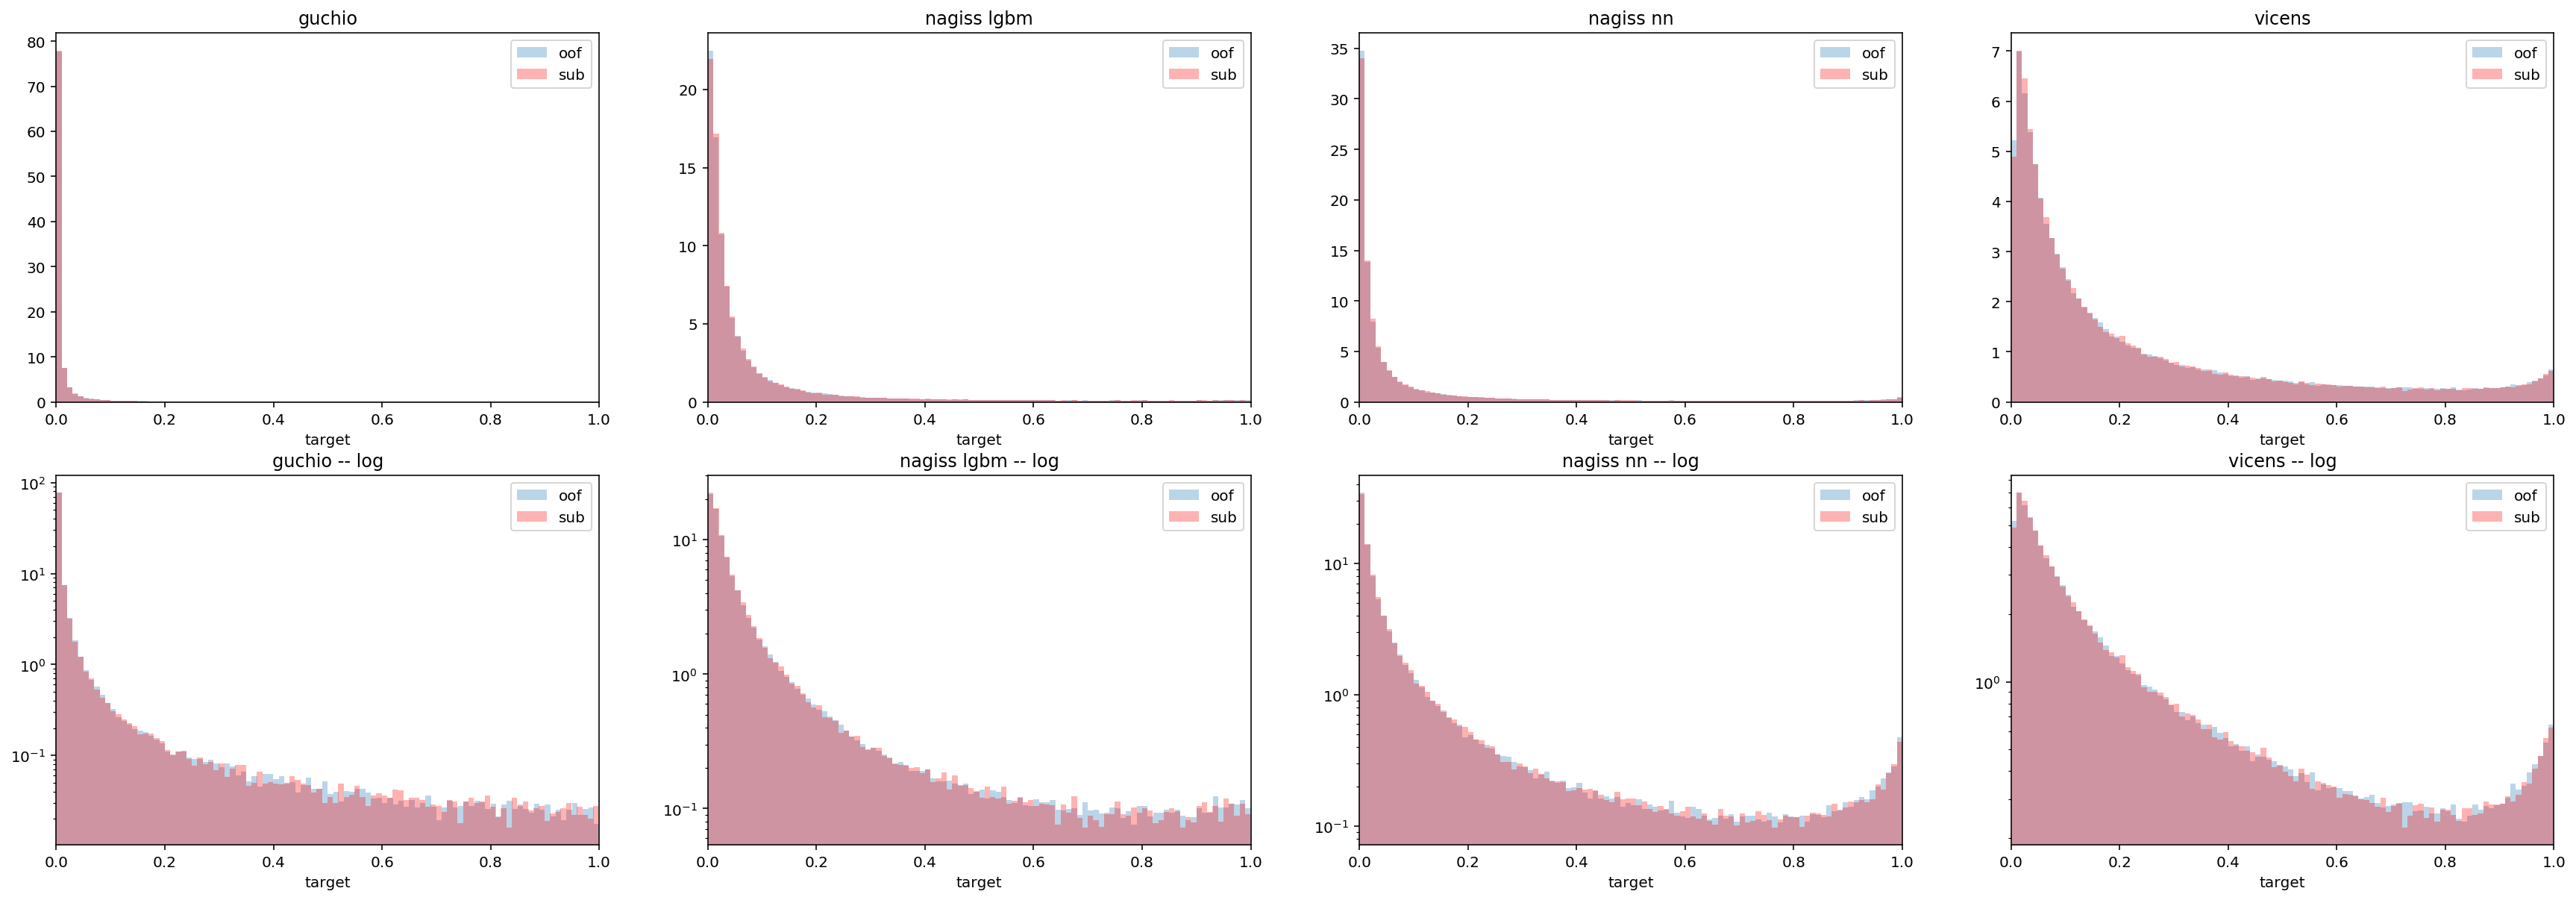

In [52]:
fig, axs = plt.subplots(2, 4, figsize=(30, 10))

# nomalscale
# guchio
ax = axs[0, 0]
ax.set_title('guchio')
plot_oof_and_sub_hist(ax, guchio_oof.oof_proba, guchio_sub.target, reals)
ax.legend()
# nagiss
ax = axs[0, 1]
ax.set_title('nagiss lgbm')
plot_oof_and_sub_hist(ax, naggis_oof.oof_proba, naggis_sub.target, reals)
ax.legend()
# nagiss
ax = axs[0, 2]
ax.set_title('nagiss nn')
plot_oof_and_sub_hist(ax, naggis_nn_oof.pred, naggis_nn_sub.target, reals)
ax.legend()
# vicens
ax = axs[0, 3]
ax.set_title('vicens')
plot_oof_and_sub_hist(ax, vicens_oof.oof_proba, vicens_sub.target, reals)
ax.legend()

## log scale
# guchio
ax = axs[1, 0]
ax.set_yscale('log')
ax.set_title('guchio -- log')
plot_oof_and_sub_hist(ax, guchio_oof.oof_proba, guchio_sub.target, reals)
ax.legend()
# nagiss
ax = axs[1, 1]
ax.set_yscale('log')
ax.set_title('nagiss lgbm -- log')
plot_oof_and_sub_hist(ax, naggis_oof.oof_proba, naggis_sub.target, reals)
ax.legend()
# nagiss nn 
ax = axs[1, 2]
ax.set_yscale('log')
ax.set_title('nagiss nn -- log')
plot_oof_and_sub_hist(ax, naggis_nn_oof.pred, naggis_nn_sub.target, reals)
ax.legend()
# vicens
ax = axs[1, 3]
ax.set_yscale('log')
ax.set_title('vicens -- log')
plot_oof_and_sub_hist(ax, vicens_oof.oof_proba, vicens_sub.target, reals)
ax.legend()

In [70]:
best_AUC = 0.0
best_weight = [0, 0, 0]

for guchio_weight in tqdm(list(range(10))):
    for naggis_weight in range(10):
        for vicens_weight in range(10):
            if guchio_weight + naggis_weight + vicens_weight == 0:
                continue
            rank_avg_pred = ((guchio_weight * guchio_oof.oof_proba.rank() / len(guchio_oof)) + \
                                           (naggis_weight * naggis_nn_oof.pred.rank() / len(guchio_oof)) + \
                                           # (naggis_weight * naggis_oof.oof_proba.rank() / len(guchio_oof)) + \
                                           (vicens_weight * vicens_oof.oof_proba.rank() / len(guchio_oof))) / (guchio_weight + naggis_weight + vicens_weight)
            auc = roc_auc_score(guchio_oof.y_val, rank_avg_pred)
            if auc > best_AUC:
                best_AUC = auc
                best_weight = [guchio_weight, naggis_weight, vicens_weight]
            print(f'AUC: {auc:.5}, guchio: {guchio_weight}, nagiss: {naggis_weight}, vicens_weight: {vicens_weight}')

AUC: 0.92375, guchio: 0, nagiss: 0, vicens_weight: 1
AUC: 0.92375, guchio: 0, nagiss: 0, vicens_weight: 2
AUC: 0.92375, guchio: 0, nagiss: 0, vicens_weight: 3
AUC: 0.92375, guchio: 0, nagiss: 0, vicens_weight: 4
AUC: 0.92375, guchio: 0, nagiss: 0, vicens_weight: 5
AUC: 0.92375, guchio: 0, nagiss: 0, vicens_weight: 6
AUC: 0.92375, guchio: 0, nagiss: 0, vicens_weight: 7
AUC: 0.92375, guchio: 0, nagiss: 0, vicens_weight: 8
AUC: 0.92375, guchio: 0, nagiss: 0, vicens_weight: 9
AUC: 0.92118, guchio: 0, nagiss: 1, vicens_weight: 0
AUC: 0.92505, guchio: 0, nagiss: 1, vicens_weight: 1
AUC: 0.92519, guchio: 0, nagiss: 1, vicens_weight: 2
AUC: 0.92505, guchio: 0, nagiss: 1, vicens_weight: 3
AUC: 0.9249, guchio: 0, nagiss: 1, vicens_weight: 4
AUC: 0.92477, guchio: 0, nagiss: 1, vicens_weight: 5
AUC: 0.92466, guchio: 0, nagiss: 1, vicens_weight: 6
AUC: 0.92457, guchio: 0, nagiss: 1, vicens_weight: 7
AUC: 0.9245, guchio: 0, nagiss: 1, vicens_weight: 8
AUC: 0.92443, guchio: 0, nagiss: 1, vicens_weigh

AUC: 0.92534, guchio: 1, nagiss: 5, vicens_weight: 7
AUC: 0.92534, guchio: 1, nagiss: 5, vicens_weight: 8
AUC: 0.92532, guchio: 1, nagiss: 5, vicens_weight: 9
AUC: 0.92272, guchio: 1, nagiss: 6, vicens_weight: 0
AUC: 0.92375, guchio: 1, nagiss: 6, vicens_weight: 1
AUC: 0.92437, guchio: 1, nagiss: 6, vicens_weight: 2
AUC: 0.92475, guchio: 1, nagiss: 6, vicens_weight: 3
AUC: 0.925, guchio: 1, nagiss: 6, vicens_weight: 4
AUC: 0.92514, guchio: 1, nagiss: 6, vicens_weight: 5
AUC: 0.92523, guchio: 1, nagiss: 6, vicens_weight: 6
AUC: 0.92529, guchio: 1, nagiss: 6, vicens_weight: 7
AUC: 0.92531, guchio: 1, nagiss: 6, vicens_weight: 8
AUC: 0.92532, guchio: 1, nagiss: 6, vicens_weight: 9
AUC: 0.92255, guchio: 1, nagiss: 7, vicens_weight: 0
AUC: 0.92353, guchio: 1, nagiss: 7, vicens_weight: 1
AUC: 0.92415, guchio: 1, nagiss: 7, vicens_weight: 2
AUC: 0.92456, guchio: 1, nagiss: 7, vicens_weight: 3
AUC: 0.92483, guchio: 1, nagiss: 7, vicens_weight: 4
AUC: 0.92501, guchio: 1, nagiss: 7, vicens_weigh

AUC: 0.92532, guchio: 3, nagiss: 1, vicens_weight: 3
AUC: 0.92525, guchio: 3, nagiss: 1, vicens_weight: 4
AUC: 0.92517, guchio: 3, nagiss: 1, vicens_weight: 5
AUC: 0.92509, guchio: 3, nagiss: 1, vicens_weight: 6
AUC: 0.92501, guchio: 3, nagiss: 1, vicens_weight: 7
AUC: 0.92494, guchio: 3, nagiss: 1, vicens_weight: 8
AUC: 0.92488, guchio: 3, nagiss: 1, vicens_weight: 9
AUC: 0.92506, guchio: 3, nagiss: 2, vicens_weight: 0
AUC: 0.9254, guchio: 3, nagiss: 2, vicens_weight: 1
AUC: 0.92551, guchio: 3, nagiss: 2, vicens_weight: 2
AUC: 0.92552, guchio: 3, nagiss: 2, vicens_weight: 3
AUC: 0.92547, guchio: 3, nagiss: 2, vicens_weight: 4
AUC: 0.92542, guchio: 3, nagiss: 2, vicens_weight: 5
AUC: 0.92535, guchio: 3, nagiss: 2, vicens_weight: 6
AUC: 0.92528, guchio: 3, nagiss: 2, vicens_weight: 7
AUC: 0.92521, guchio: 3, nagiss: 2, vicens_weight: 8
AUC: 0.92515, guchio: 3, nagiss: 2, vicens_weight: 9
AUC: 0.92488, guchio: 3, nagiss: 3, vicens_weight: 0
AUC: 0.92528, guchio: 3, nagiss: 3, vicens_weig

AUC: 0.92549, guchio: 4, nagiss: 6, vicens_weight: 9
AUC: 0.92433, guchio: 4, nagiss: 7, vicens_weight: 0
AUC: 0.92472, guchio: 4, nagiss: 7, vicens_weight: 1
AUC: 0.92499, guchio: 4, nagiss: 7, vicens_weight: 2
AUC: 0.92517, guchio: 4, nagiss: 7, vicens_weight: 3
AUC: 0.92529, guchio: 4, nagiss: 7, vicens_weight: 4
AUC: 0.92538, guchio: 4, nagiss: 7, vicens_weight: 5
AUC: 0.92543, guchio: 4, nagiss: 7, vicens_weight: 6
AUC: 0.92546, guchio: 4, nagiss: 7, vicens_weight: 7
AUC: 0.92548, guchio: 4, nagiss: 7, vicens_weight: 8
AUC: 0.92548, guchio: 4, nagiss: 7, vicens_weight: 9
AUC: 0.92416, guchio: 4, nagiss: 8, vicens_weight: 0
AUC: 0.92456, guchio: 4, nagiss: 8, vicens_weight: 1
AUC: 0.92484, guchio: 4, nagiss: 8, vicens_weight: 2
AUC: 0.92504, guchio: 4, nagiss: 8, vicens_weight: 3
AUC: 0.92518, guchio: 4, nagiss: 8, vicens_weight: 4
AUC: 0.92529, guchio: 4, nagiss: 8, vicens_weight: 5
AUC: 0.92536, guchio: 4, nagiss: 8, vicens_weight: 6
AUC: 0.92541, guchio: 4, nagiss: 8, vicens_wei

AUC: 0.92534, guchio: 6, nagiss: 2, vicens_weight: 5
AUC: 0.92532, guchio: 6, nagiss: 2, vicens_weight: 6
AUC: 0.92528, guchio: 6, nagiss: 2, vicens_weight: 7
AUC: 0.92525, guchio: 6, nagiss: 2, vicens_weight: 8
AUC: 0.92521, guchio: 6, nagiss: 2, vicens_weight: 9
AUC: 0.92509, guchio: 6, nagiss: 3, vicens_weight: 0
AUC: 0.92529, guchio: 6, nagiss: 3, vicens_weight: 1
AUC: 0.9254, guchio: 6, nagiss: 3, vicens_weight: 2
AUC: 0.92545, guchio: 6, nagiss: 3, vicens_weight: 3
AUC: 0.92547, guchio: 6, nagiss: 3, vicens_weight: 4
AUC: 0.92547, guchio: 6, nagiss: 3, vicens_weight: 5
AUC: 0.92545, guchio: 6, nagiss: 3, vicens_weight: 6
AUC: 0.92542, guchio: 6, nagiss: 3, vicens_weight: 7
AUC: 0.92539, guchio: 6, nagiss: 3, vicens_weight: 8
AUC: 0.92535, guchio: 6, nagiss: 3, vicens_weight: 9
AUC: 0.92506, guchio: 6, nagiss: 4, vicens_weight: 0
AUC: 0.92528, guchio: 6, nagiss: 4, vicens_weight: 1
AUC: 0.9254, guchio: 6, nagiss: 4, vicens_weight: 2
AUC: 0.92548, guchio: 6, nagiss: 4, vicens_weigh

AUC: 0.92477, guchio: 7, nagiss: 8, vicens_weight: 0
AUC: 0.925, guchio: 7, nagiss: 8, vicens_weight: 1
AUC: 0.92516, guchio: 7, nagiss: 8, vicens_weight: 2
AUC: 0.92528, guchio: 7, nagiss: 8, vicens_weight: 3
AUC: 0.92537, guchio: 7, nagiss: 8, vicens_weight: 4
AUC: 0.92543, guchio: 7, nagiss: 8, vicens_weight: 5
AUC: 0.92547, guchio: 7, nagiss: 8, vicens_weight: 6
AUC: 0.9255, guchio: 7, nagiss: 8, vicens_weight: 7
AUC: 0.92552, guchio: 7, nagiss: 8, vicens_weight: 8
AUC: 0.92553, guchio: 7, nagiss: 8, vicens_weight: 9
AUC: 0.92467, guchio: 7, nagiss: 9, vicens_weight: 0
AUC: 0.9249, guchio: 7, nagiss: 9, vicens_weight: 1
AUC: 0.92507, guchio: 7, nagiss: 9, vicens_weight: 2
AUC: 0.9252, guchio: 7, nagiss: 9, vicens_weight: 3
AUC: 0.9253, guchio: 7, nagiss: 9, vicens_weight: 4
AUC: 0.92537, guchio: 7, nagiss: 9, vicens_weight: 5
AUC: 0.92543, guchio: 7, nagiss: 9, vicens_weight: 6
AUC: 0.92546, guchio: 7, nagiss: 9, vicens_weight: 7
AUC: 0.92549, guchio: 7, nagiss: 9, vicens_weight: 8

AUC: 0.92536, guchio: 9, nagiss: 3, vicens_weight: 6
AUC: 0.92535, guchio: 9, nagiss: 3, vicens_weight: 7
AUC: 0.92533, guchio: 9, nagiss: 3, vicens_weight: 8
AUC: 0.92532, guchio: 9, nagiss: 3, vicens_weight: 9
AUC: 0.92508, guchio: 9, nagiss: 4, vicens_weight: 0
AUC: 0.92522, guchio: 9, nagiss: 4, vicens_weight: 1
AUC: 0.92532, guchio: 9, nagiss: 4, vicens_weight: 2
AUC: 0.92538, guchio: 9, nagiss: 4, vicens_weight: 3
AUC: 0.92542, guchio: 9, nagiss: 4, vicens_weight: 4
AUC: 0.92544, guchio: 9, nagiss: 4, vicens_weight: 5
AUC: 0.92544, guchio: 9, nagiss: 4, vicens_weight: 6
AUC: 0.92544, guchio: 9, nagiss: 4, vicens_weight: 7
AUC: 0.92543, guchio: 9, nagiss: 4, vicens_weight: 8
AUC: 0.92541, guchio: 9, nagiss: 4, vicens_weight: 9
AUC: 0.92509, guchio: 9, nagiss: 5, vicens_weight: 0
AUC: 0.92524, guchio: 9, nagiss: 5, vicens_weight: 1
AUC: 0.92534, guchio: 9, nagiss: 5, vicens_weight: 2
AUC: 0.92541, guchio: 9, nagiss: 5, vicens_weight: 3
AUC: 0.92545, guchio: 9, nagiss: 5, vicens_wei

In [68]:
best_AUC

0.924844728573539

In [69]:
# guchio, naggis, vicens
best_weight

[9, 3, 7]

In [71]:
best_AUC

0.92553759012496

In [72]:
# guchio, naggis, vicens
best_weight

[7, 6, 7]

In [101]:
best_AUC = 0.0
best_weight = [0, 0, 0]

for guchio_weight in tqdm(list(range(20))):
    for naggis_weight in range(20):
        for naggis_nn_weight in range(20):
            for vicens_weight in range(20):
                if (guchio_weight + naggis_weight + vicens_weight) == 0:
                    continue
                if (guchio_weight + naggis_nn_weight + naggis_weight + vicens_weight) != 20:
                    continue
                rank_avg_pred = ((guchio_weight * guchio_oof.oof_proba.rank() / len(guchio_oof)) + \
                                                           (naggis_nn_weight * naggis_nn_oof.pred.rank() / len(guchio_oof)) + \
                                                           (naggis_weight * naggis_oof.oof_proba.rank() / len(guchio_oof)) + \
                                                           (vicens_weight * vicens_oof.oof_proba.rank() / len(guchio_oof))) / (guchio_weight + naggis_weight + naggis_nn_weight + vicens_weight)
                auc = roc_auc_score(guchio_oof.y_val, rank_avg_pred)
                if auc > best_AUC:
                    best_AUC = auc
                    best_weight = [guchio_weight, naggis_weight, naggis_nn_weight, vicens_weight]
                print(f'AUC: {auc:.5}, guchio: {guchio_weight}, nagiss: {naggis_weight}, nagiss nn: {naggis_nn_weight}, vicens_weight: {vicens_weight}')

AUC: 0.92412, guchio: 0, nagiss: 0, nagiss nn: 1, vicens_weight: 19
AUC: 0.92443, guchio: 0, nagiss: 0, nagiss nn: 2, vicens_weight: 18
AUC: 0.92469, guchio: 0, nagiss: 0, nagiss nn: 3, vicens_weight: 17
AUC: 0.9249, guchio: 0, nagiss: 0, nagiss nn: 4, vicens_weight: 16
AUC: 0.92505, guchio: 0, nagiss: 0, nagiss nn: 5, vicens_weight: 15
AUC: 0.92515, guchio: 0, nagiss: 0, nagiss nn: 6, vicens_weight: 14
AUC: 0.9252, guchio: 0, nagiss: 0, nagiss nn: 7, vicens_weight: 13
AUC: 0.9252, guchio: 0, nagiss: 0, nagiss nn: 8, vicens_weight: 12
AUC: 0.92515, guchio: 0, nagiss: 0, nagiss nn: 9, vicens_weight: 11
AUC: 0.92505, guchio: 0, nagiss: 0, nagiss nn: 10, vicens_weight: 10
AUC: 0.9249, guchio: 0, nagiss: 0, nagiss nn: 11, vicens_weight: 9
AUC: 0.92469, guchio: 0, nagiss: 0, nagiss nn: 12, vicens_weight: 8
AUC: 0.92444, guchio: 0, nagiss: 0, nagiss nn: 13, vicens_weight: 7
AUC: 0.92413, guchio: 0, nagiss: 0, nagiss nn: 14, vicens_weight: 6
AUC: 0.92378, guchio: 0, nagiss: 0, nagiss nn: 15, 

AUC: 0.92452, guchio: 0, nagiss: 6, nagiss nn: 12, vicens_weight: 2
AUC: 0.92422, guchio: 0, nagiss: 6, nagiss nn: 13, vicens_weight: 1
AUC: 0.92387, guchio: 0, nagiss: 6, nagiss nn: 14, vicens_weight: 0
AUC: 0.92404, guchio: 0, nagiss: 7, nagiss nn: 0, vicens_weight: 13
AUC: 0.92436, guchio: 0, nagiss: 7, nagiss nn: 1, vicens_weight: 12
AUC: 0.92463, guchio: 0, nagiss: 7, nagiss nn: 2, vicens_weight: 11
AUC: 0.92484, guchio: 0, nagiss: 7, nagiss nn: 3, vicens_weight: 10
AUC: 0.925, guchio: 0, nagiss: 7, nagiss nn: 4, vicens_weight: 9
AUC: 0.9251, guchio: 0, nagiss: 7, nagiss nn: 5, vicens_weight: 8
AUC: 0.92515, guchio: 0, nagiss: 7, nagiss nn: 6, vicens_weight: 7
AUC: 0.92515, guchio: 0, nagiss: 7, nagiss nn: 7, vicens_weight: 6
AUC: 0.9251, guchio: 0, nagiss: 7, nagiss nn: 8, vicens_weight: 5
AUC: 0.925, guchio: 0, nagiss: 7, nagiss nn: 9, vicens_weight: 4
AUC: 0.92485, guchio: 0, nagiss: 7, nagiss nn: 10, vicens_weight: 3
AUC: 0.92464, guchio: 0, nagiss: 7, nagiss nn: 11, vicens_we

AUC: 0.92415, guchio: 1, nagiss: 0, nagiss nn: 14, vicens_weight: 5
AUC: 0.92378, guchio: 1, nagiss: 0, nagiss nn: 15, vicens_weight: 4
AUC: 0.92336, guchio: 1, nagiss: 0, nagiss nn: 16, vicens_weight: 3
AUC: 0.92288, guchio: 1, nagiss: 0, nagiss nn: 17, vicens_weight: 2
AUC: 0.92235, guchio: 1, nagiss: 0, nagiss nn: 18, vicens_weight: 1
AUC: 0.92177, guchio: 1, nagiss: 0, nagiss nn: 19, vicens_weight: 0
AUC: 0.92405, guchio: 1, nagiss: 1, nagiss nn: 0, vicens_weight: 18
AUC: 0.9244, guchio: 1, nagiss: 1, nagiss nn: 1, vicens_weight: 17
AUC: 0.9247, guchio: 1, nagiss: 1, nagiss nn: 2, vicens_weight: 16
AUC: 0.92494, guchio: 1, nagiss: 1, nagiss nn: 3, vicens_weight: 15
AUC: 0.92513, guchio: 1, nagiss: 1, nagiss nn: 4, vicens_weight: 14
AUC: 0.92526, guchio: 1, nagiss: 1, nagiss nn: 5, vicens_weight: 13
AUC: 0.92535, guchio: 1, nagiss: 1, nagiss nn: 6, vicens_weight: 12
AUC: 0.92538, guchio: 1, nagiss: 1, nagiss nn: 7, vicens_weight: 11
AUC: 0.92536, guchio: 1, nagiss: 1, nagiss nn: 8, 

AUC: 0.92497, guchio: 1, nagiss: 8, nagiss nn: 4, vicens_weight: 7
AUC: 0.92505, guchio: 1, nagiss: 8, nagiss nn: 5, vicens_weight: 6
AUC: 0.92509, guchio: 1, nagiss: 8, nagiss nn: 6, vicens_weight: 5
AUC: 0.92507, guchio: 1, nagiss: 8, nagiss nn: 7, vicens_weight: 4
AUC: 0.925, guchio: 1, nagiss: 8, nagiss nn: 8, vicens_weight: 3
AUC: 0.92488, guchio: 1, nagiss: 8, nagiss nn: 9, vicens_weight: 2
AUC: 0.9247, guchio: 1, nagiss: 8, nagiss nn: 10, vicens_weight: 1
AUC: 0.92448, guchio: 1, nagiss: 8, nagiss nn: 11, vicens_weight: 0
AUC: 0.92397, guchio: 1, nagiss: 9, nagiss nn: 0, vicens_weight: 10
AUC: 0.92427, guchio: 1, nagiss: 9, nagiss nn: 1, vicens_weight: 9
AUC: 0.92451, guchio: 1, nagiss: 9, nagiss nn: 2, vicens_weight: 8
AUC: 0.92469, guchio: 1, nagiss: 9, nagiss nn: 3, vicens_weight: 7
AUC: 0.92482, guchio: 1, nagiss: 9, nagiss nn: 4, vicens_weight: 6
AUC: 0.9249, guchio: 1, nagiss: 9, nagiss nn: 5, vicens_weight: 5
AUC: 0.92493, guchio: 1, nagiss: 9, nagiss nn: 6, vicens_weight

AUC: 0.92523, guchio: 2, nagiss: 2, nagiss nn: 10, vicens_weight: 6
AUC: 0.92504, guchio: 2, nagiss: 2, nagiss nn: 11, vicens_weight: 5
AUC: 0.9248, guchio: 2, nagiss: 2, nagiss nn: 12, vicens_weight: 4
AUC: 0.92451, guchio: 2, nagiss: 2, nagiss nn: 13, vicens_weight: 3
AUC: 0.92416, guchio: 2, nagiss: 2, nagiss nn: 14, vicens_weight: 2
AUC: 0.92377, guchio: 2, nagiss: 2, nagiss nn: 15, vicens_weight: 1
AUC: 0.92332, guchio: 2, nagiss: 2, nagiss nn: 16, vicens_weight: 0
AUC: 0.92436, guchio: 2, nagiss: 3, nagiss nn: 0, vicens_weight: 15
AUC: 0.92468, guchio: 2, nagiss: 3, nagiss nn: 1, vicens_weight: 14
AUC: 0.92495, guchio: 2, nagiss: 3, nagiss nn: 2, vicens_weight: 13
AUC: 0.92517, guchio: 2, nagiss: 3, nagiss nn: 3, vicens_weight: 12
AUC: 0.92533, guchio: 2, nagiss: 3, nagiss nn: 4, vicens_weight: 11
AUC: 0.92544, guchio: 2, nagiss: 3, nagiss nn: 5, vicens_weight: 10
AUC: 0.9255, guchio: 2, nagiss: 3, nagiss nn: 6, vicens_weight: 9
AUC: 0.92551, guchio: 2, nagiss: 3, nagiss nn: 7, v

AUC: 0.92329, guchio: 2, nagiss: 13, nagiss nn: 0, vicens_weight: 5
AUC: 0.92354, guchio: 2, nagiss: 13, nagiss nn: 1, vicens_weight: 4
AUC: 0.92374, guchio: 2, nagiss: 13, nagiss nn: 2, vicens_weight: 3
AUC: 0.92389, guchio: 2, nagiss: 13, nagiss nn: 3, vicens_weight: 2
AUC: 0.92398, guchio: 2, nagiss: 13, nagiss nn: 4, vicens_weight: 1
AUC: 0.92401, guchio: 2, nagiss: 13, nagiss nn: 5, vicens_weight: 0
AUC: 0.92302, guchio: 2, nagiss: 14, nagiss nn: 0, vicens_weight: 4
AUC: 0.92326, guchio: 2, nagiss: 14, nagiss nn: 1, vicens_weight: 3
AUC: 0.92346, guchio: 2, nagiss: 14, nagiss nn: 2, vicens_weight: 2
AUC: 0.92359, guchio: 2, nagiss: 14, nagiss nn: 3, vicens_weight: 1
AUC: 0.92368, guchio: 2, nagiss: 14, nagiss nn: 4, vicens_weight: 0
AUC: 0.92271, guchio: 2, nagiss: 15, nagiss nn: 0, vicens_weight: 3
AUC: 0.92296, guchio: 2, nagiss: 15, nagiss nn: 1, vicens_weight: 2
AUC: 0.92314, guchio: 2, nagiss: 15, nagiss nn: 2, vicens_weight: 1
AUC: 0.92327, guchio: 2, nagiss: 15, nagiss nn: 

AUC: 0.9253, guchio: 3, nagiss: 6, nagiss nn: 8, vicens_weight: 3
AUC: 0.92517, guchio: 3, nagiss: 6, nagiss nn: 9, vicens_weight: 2
AUC: 0.92499, guchio: 3, nagiss: 6, nagiss nn: 10, vicens_weight: 1
AUC: 0.92476, guchio: 3, nagiss: 6, nagiss nn: 11, vicens_weight: 0
AUC: 0.92438, guchio: 3, nagiss: 7, nagiss nn: 0, vicens_weight: 10
AUC: 0.92467, guchio: 3, nagiss: 7, nagiss nn: 1, vicens_weight: 9
AUC: 0.9249, guchio: 3, nagiss: 7, nagiss nn: 2, vicens_weight: 8
AUC: 0.92508, guchio: 3, nagiss: 7, nagiss nn: 3, vicens_weight: 7
AUC: 0.9252, guchio: 3, nagiss: 7, nagiss nn: 4, vicens_weight: 6
AUC: 0.92527, guchio: 3, nagiss: 7, nagiss nn: 5, vicens_weight: 5
AUC: 0.92529, guchio: 3, nagiss: 7, nagiss nn: 6, vicens_weight: 4
AUC: 0.92526, guchio: 3, nagiss: 7, nagiss nn: 7, vicens_weight: 3
AUC: 0.92517, guchio: 3, nagiss: 7, nagiss nn: 8, vicens_weight: 2
AUC: 0.92504, guchio: 3, nagiss: 7, nagiss nn: 9, vicens_weight: 1
AUC: 0.92485, guchio: 3, nagiss: 7, nagiss nn: 10, vicens_weig

AUC: 0.92546, guchio: 4, nagiss: 3, nagiss nn: 4, vicens_weight: 9
AUC: 0.92555, guchio: 4, nagiss: 3, nagiss nn: 5, vicens_weight: 8
AUC: 0.92559, guchio: 4, nagiss: 3, nagiss nn: 6, vicens_weight: 7
AUC: 0.92557, guchio: 4, nagiss: 3, nagiss nn: 7, vicens_weight: 6
AUC: 0.92551, guchio: 4, nagiss: 3, nagiss nn: 8, vicens_weight: 5
AUC: 0.92539, guchio: 4, nagiss: 3, nagiss nn: 9, vicens_weight: 4
AUC: 0.92522, guchio: 4, nagiss: 3, nagiss nn: 10, vicens_weight: 3
AUC: 0.925, guchio: 4, nagiss: 3, nagiss nn: 11, vicens_weight: 2
AUC: 0.92473, guchio: 4, nagiss: 3, nagiss nn: 12, vicens_weight: 1
AUC: 0.9244, guchio: 4, nagiss: 3, nagiss nn: 13, vicens_weight: 0
AUC: 0.9246, guchio: 4, nagiss: 4, nagiss nn: 0, vicens_weight: 12
AUC: 0.92489, guchio: 4, nagiss: 4, nagiss nn: 1, vicens_weight: 11
AUC: 0.92513, guchio: 4, nagiss: 4, nagiss nn: 2, vicens_weight: 10
AUC: 0.92532, guchio: 4, nagiss: 4, nagiss nn: 3, vicens_weight: 9
AUC: 0.92545, guchio: 4, nagiss: 4, nagiss nn: 4, vicens_we

AUC: 0.92554, guchio: 5, nagiss: 1, nagiss nn: 5, vicens_weight: 9
AUC: 0.92558, guchio: 5, nagiss: 1, nagiss nn: 6, vicens_weight: 8
AUC: 0.92556, guchio: 5, nagiss: 1, nagiss nn: 7, vicens_weight: 7
AUC: 0.9255, guchio: 5, nagiss: 1, nagiss nn: 8, vicens_weight: 6
AUC: 0.92538, guchio: 5, nagiss: 1, nagiss nn: 9, vicens_weight: 5
AUC: 0.92522, guchio: 5, nagiss: 1, nagiss nn: 10, vicens_weight: 4
AUC: 0.925, guchio: 5, nagiss: 1, nagiss nn: 11, vicens_weight: 3
AUC: 0.92473, guchio: 5, nagiss: 1, nagiss nn: 12, vicens_weight: 2
AUC: 0.92441, guchio: 5, nagiss: 1, nagiss nn: 13, vicens_weight: 1
AUC: 0.92404, guchio: 5, nagiss: 1, nagiss nn: 14, vicens_weight: 0
AUC: 0.92463, guchio: 5, nagiss: 2, nagiss nn: 0, vicens_weight: 13
AUC: 0.92492, guchio: 5, nagiss: 2, nagiss nn: 1, vicens_weight: 12
AUC: 0.92517, guchio: 5, nagiss: 2, nagiss nn: 2, vicens_weight: 11
AUC: 0.92536, guchio: 5, nagiss: 2, nagiss nn: 3, vicens_weight: 10
AUC: 0.92549, guchio: 5, nagiss: 2, nagiss nn: 4, vicens

AUC: 0.92552, guchio: 6, nagiss: 0, nagiss nn: 7, vicens_weight: 7
AUC: 0.92545, guchio: 6, nagiss: 0, nagiss nn: 8, vicens_weight: 6
AUC: 0.92533, guchio: 6, nagiss: 0, nagiss nn: 9, vicens_weight: 5
AUC: 0.92516, guchio: 6, nagiss: 0, nagiss nn: 10, vicens_weight: 4
AUC: 0.92494, guchio: 6, nagiss: 0, nagiss nn: 11, vicens_weight: 3
AUC: 0.92466, guchio: 6, nagiss: 0, nagiss nn: 12, vicens_weight: 2
AUC: 0.92434, guchio: 6, nagiss: 0, nagiss nn: 13, vicens_weight: 1
AUC: 0.92396, guchio: 6, nagiss: 0, nagiss nn: 14, vicens_weight: 0
AUC: 0.92464, guchio: 6, nagiss: 1, nagiss nn: 0, vicens_weight: 13
AUC: 0.92493, guchio: 6, nagiss: 1, nagiss nn: 1, vicens_weight: 12
AUC: 0.92517, guchio: 6, nagiss: 1, nagiss nn: 2, vicens_weight: 11
AUC: 0.92535, guchio: 6, nagiss: 1, nagiss nn: 3, vicens_weight: 10
AUC: 0.92548, guchio: 6, nagiss: 1, nagiss nn: 4, vicens_weight: 9
AUC: 0.92556, guchio: 6, nagiss: 1, nagiss nn: 5, vicens_weight: 8
AUC: 0.92559, guchio: 6, nagiss: 1, nagiss nn: 6, vic

AUC: 0.9253, guchio: 7, nagiss: 0, nagiss nn: 9, vicens_weight: 4
AUC: 0.92512, guchio: 7, nagiss: 0, nagiss nn: 10, vicens_weight: 3
AUC: 0.92488, guchio: 7, nagiss: 0, nagiss nn: 11, vicens_weight: 2
AUC: 0.9246, guchio: 7, nagiss: 0, nagiss nn: 12, vicens_weight: 1
AUC: 0.92426, guchio: 7, nagiss: 0, nagiss nn: 13, vicens_weight: 0
AUC: 0.9247, guchio: 7, nagiss: 1, nagiss nn: 0, vicens_weight: 12
AUC: 0.92498, guchio: 7, nagiss: 1, nagiss nn: 1, vicens_weight: 11
AUC: 0.92521, guchio: 7, nagiss: 1, nagiss nn: 2, vicens_weight: 10
AUC: 0.92538, guchio: 7, nagiss: 1, nagiss nn: 3, vicens_weight: 9
AUC: 0.9255, guchio: 7, nagiss: 1, nagiss nn: 4, vicens_weight: 8
AUC: 0.92557, guchio: 7, nagiss: 1, nagiss nn: 5, vicens_weight: 7
AUC: 0.92559, guchio: 7, nagiss: 1, nagiss nn: 6, vicens_weight: 6
AUC: 0.92555, guchio: 7, nagiss: 1, nagiss nn: 7, vicens_weight: 5
AUC: 0.92546, guchio: 7, nagiss: 1, nagiss nn: 8, vicens_weight: 4
AUC: 0.92533, guchio: 7, nagiss: 1, nagiss nn: 9, vicens_we

AUC: 0.92507, guchio: 8, nagiss: 2, nagiss nn: 1, vicens_weight: 9
AUC: 0.92527, guchio: 8, nagiss: 2, nagiss nn: 2, vicens_weight: 8
AUC: 0.92543, guchio: 8, nagiss: 2, nagiss nn: 3, vicens_weight: 7
AUC: 0.92553, guchio: 8, nagiss: 2, nagiss nn: 4, vicens_weight: 6
AUC: 0.92558, guchio: 8, nagiss: 2, nagiss nn: 5, vicens_weight: 5
AUC: 0.92558, guchio: 8, nagiss: 2, nagiss nn: 6, vicens_weight: 4
AUC: 0.92552, guchio: 8, nagiss: 2, nagiss nn: 7, vicens_weight: 3
AUC: 0.92542, guchio: 8, nagiss: 2, nagiss nn: 8, vicens_weight: 2
AUC: 0.92526, guchio: 8, nagiss: 2, nagiss nn: 9, vicens_weight: 1
AUC: 0.92505, guchio: 8, nagiss: 2, nagiss nn: 10, vicens_weight: 0
AUC: 0.92482, guchio: 8, nagiss: 3, nagiss nn: 0, vicens_weight: 9
AUC: 0.92508, guchio: 8, nagiss: 3, nagiss nn: 1, vicens_weight: 8
AUC: 0.92528, guchio: 8, nagiss: 3, nagiss nn: 2, vicens_weight: 7
AUC: 0.92543, guchio: 8, nagiss: 3, nagiss nn: 3, vicens_weight: 6
AUC: 0.92553, guchio: 8, nagiss: 3, nagiss nn: 4, vicens_weig

AUC: 0.92493, guchio: 9, nagiss: 6, nagiss nn: 1, vicens_weight: 4
AUC: 0.9251, guchio: 9, nagiss: 6, nagiss nn: 2, vicens_weight: 3
AUC: 0.92522, guchio: 9, nagiss: 6, nagiss nn: 3, vicens_weight: 2
AUC: 0.92528, guchio: 9, nagiss: 6, nagiss nn: 4, vicens_weight: 1
AUC: 0.92529, guchio: 9, nagiss: 6, nagiss nn: 5, vicens_weight: 0
AUC: 0.9246, guchio: 9, nagiss: 7, nagiss nn: 0, vicens_weight: 4
AUC: 0.92482, guchio: 9, nagiss: 7, nagiss nn: 1, vicens_weight: 3
AUC: 0.92498, guchio: 9, nagiss: 7, nagiss nn: 2, vicens_weight: 2
AUC: 0.92509, guchio: 9, nagiss: 7, nagiss nn: 3, vicens_weight: 1
AUC: 0.92515, guchio: 9, nagiss: 7, nagiss nn: 4, vicens_weight: 0
AUC: 0.92447, guchio: 9, nagiss: 8, nagiss nn: 0, vicens_weight: 3
AUC: 0.92468, guchio: 9, nagiss: 8, nagiss nn: 1, vicens_weight: 2
AUC: 0.92483, guchio: 9, nagiss: 8, nagiss nn: 2, vicens_weight: 1
AUC: 0.92493, guchio: 9, nagiss: 8, nagiss nn: 3, vicens_weight: 0
AUC: 0.9243, guchio: 9, nagiss: 9, nagiss nn: 0, vicens_weight: 

AUC: 0.92502, guchio: 11, nagiss: 4, nagiss nn: 1, vicens_weight: 4
AUC: 0.92518, guchio: 11, nagiss: 4, nagiss nn: 2, vicens_weight: 3
AUC: 0.92528, guchio: 11, nagiss: 4, nagiss nn: 3, vicens_weight: 2
AUC: 0.92534, guchio: 11, nagiss: 4, nagiss nn: 4, vicens_weight: 1
AUC: 0.92534, guchio: 11, nagiss: 4, nagiss nn: 5, vicens_weight: 0
AUC: 0.92474, guchio: 11, nagiss: 5, nagiss nn: 0, vicens_weight: 4
AUC: 0.92495, guchio: 11, nagiss: 5, nagiss nn: 1, vicens_weight: 3
AUC: 0.9251, guchio: 11, nagiss: 5, nagiss nn: 2, vicens_weight: 2
AUC: 0.9252, guchio: 11, nagiss: 5, nagiss nn: 3, vicens_weight: 1
AUC: 0.92525, guchio: 11, nagiss: 5, nagiss nn: 4, vicens_weight: 0
AUC: 0.92466, guchio: 11, nagiss: 6, nagiss nn: 0, vicens_weight: 3
AUC: 0.92486, guchio: 11, nagiss: 6, nagiss nn: 1, vicens_weight: 2
AUC: 0.925, guchio: 11, nagiss: 6, nagiss nn: 2, vicens_weight: 1
AUC: 0.92509, guchio: 11, nagiss: 6, nagiss nn: 3, vicens_weight: 0
AUC: 0.92454, guchio: 11, nagiss: 7, nagiss nn: 0, v

AUC: 0.925, guchio: 14, nagiss: 3, nagiss nn: 2, vicens_weight: 1
AUC: 0.92507, guchio: 14, nagiss: 3, nagiss nn: 3, vicens_weight: 0
AUC: 0.92463, guchio: 14, nagiss: 4, nagiss nn: 0, vicens_weight: 2
AUC: 0.92481, guchio: 14, nagiss: 4, nagiss nn: 1, vicens_weight: 1
AUC: 0.92493, guchio: 14, nagiss: 4, nagiss nn: 2, vicens_weight: 0
AUC: 0.92455, guchio: 14, nagiss: 5, nagiss nn: 0, vicens_weight: 1
AUC: 0.92472, guchio: 14, nagiss: 5, nagiss nn: 1, vicens_weight: 0
AUC: 0.92444, guchio: 14, nagiss: 6, nagiss nn: 0, vicens_weight: 0
AUC: 0.92456, guchio: 15, nagiss: 0, nagiss nn: 0, vicens_weight: 5
AUC: 0.92476, guchio: 15, nagiss: 0, nagiss nn: 1, vicens_weight: 4
AUC: 0.9249, guchio: 15, nagiss: 0, nagiss nn: 2, vicens_weight: 3
AUC: 0.92499, guchio: 15, nagiss: 0, nagiss nn: 3, vicens_weight: 2
AUC: 0.92502, guchio: 15, nagiss: 0, nagiss nn: 4, vicens_weight: 1
AUC: 0.925, guchio: 15, nagiss: 0, nagiss nn: 5, vicens_weight: 0
AUC: 0.9246, guchio: 15, nagiss: 1, nagiss nn: 0, vic

In [103]:
best_AUC

0.9256153308947799

In [104]:
# guchio, naggis, vicens
best_weight

[6, 2, 6, 6]

In [92]:
res = (9 * guchio_sub.iloc[reals].target.rank() + 3 * naggis_sub.iloc[reals].target.rank() + 7 * vicens_sub.iloc[reals].target.rank()) / len(reals) / (9 + 3 + 7)

In [93]:
res

3         0.801067
7         0.669517
11        0.593961
15        0.542930
16        0.922835
17        0.416702
18        0.685050
20        0.954172
21        0.515073
22        0.260281
24        0.182162
29        0.364379
34        0.388459
37        0.186386
39        0.851198
42        0.268623
43        0.142843
44        0.470238
45        0.255460
46        0.200911
48        0.156781
50        0.864446
53        0.780115
54        0.628861
55        0.540903
56        0.877253
57        0.041848
63        0.593112
66        0.078764
67        0.723096
68        0.188425
69        0.004281
70        0.859357
72        0.748869
74        0.390118
75        0.657567
77        0.701933
78        0.024543
79        0.599311
80        0.825014
81        0.192277
83        0.370430
89        0.407948
91        0.342457
92        0.106809
97        0.088382
105       0.503902
106       0.677207
110       0.609591
112       0.851478
114       0.307926
115       0.192313
117       0.

In [95]:
res_df = guchio_sub.copy()
res_df.iloc[reals, 1] = res.values
res_df.head()

,ID_code,target
0,test_0,0.008703
1,test_1,0.024498
2,test_2,0.027850
3,test_3,0.012221
4,test_4,0.008131


In [97]:
res_df.head()

,ID_code,target
0,test_0,0.008703
1,test_1,0.024498
2,test_2,0.027850
3,test_3,0.801067
4,test_4,0.008131


In [98]:
res_df.to_csv('../mnt/submissions/guchio9_naggis3_vicens7_rank_avg_CV_0.92484.csv.gz', index=False, compression='gzip')

In [105]:
res = (6 * guchio_sub.iloc[reals].target.rank() + 2 * naggis_sub.iloc[reals].target.rank() + 6 * naggis_nn_sub.iloc[reals].target.rank() + 6 * vicens_sub.iloc[reals].target.rank()) / len(reals) / (6 + 2 + 6 + 6)

In [106]:
res[:100]

3      0.798564
7      0.702532
11     0.621612
15     0.502586
16     0.928578
17     0.447249
18     0.687894
20     0.943871
21     0.486189
22     0.258957
24     0.196108
29     0.432251
34     0.378578
37     0.175528
39     0.836127
42     0.296286
43     0.157316
44     0.472646
45     0.239585
46     0.248768
48     0.180711
50     0.869701
53     0.744353
54     0.604214
55     0.548580
56     0.877892
57     0.041097
63     0.642153
66     0.069175
67     0.725951
68     0.187305
69     0.006741
70     0.854803
72     0.751316
74     0.390922
75     0.630173
77     0.679454
78     0.030620
79     0.557760
80     0.838014
81     0.167962
83     0.414977
89     0.396834
91     0.342806
92     0.123459
97     0.103312
105    0.557046
106    0.642128
110    0.582571
112    0.851703
114    0.244664
115    0.226151
117    0.067252
120    0.319876
121    0.912645
122    0.001824
124    0.384671
125    0.510804
126    0.949669
127    0.228891
130    0.252018
131    0.826970
132    0

In [107]:
res_df = guchio_sub.copy()
res_df.iloc[reals, 1] = res.values
res_df.head()

,ID_code,target
0,test_0,0.008703
1,test_1,0.024498
2,test_2,0.027850
3,test_3,0.798564
4,test_4,0.008131


In [108]:
res_df.to_csv('../mnt/submissions/guchio3_nagissLGBM1_nagissNN3_vicens3_real_rank_avg_CV_0.92561.csv.gz', index=False, compression='gzip')

In [ ]:
plot_oof_and_sub_hist(ax, naggis_oof.oof_proba, naggis_sub.target, reals)